In [15]:
import scipy as sp
import numpy as np
import pandas as pd
import sklearn
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import timedelta, datetime
import re
import timeit


pd.options.display.max_rows = 4000

In [16]:

# Pulling data from ANRGUSC github
df = pd.read_csv('https://raw.githubusercontent.com/ANRGUSC/covid19_risk_estimation/master/data/Covid-19-R.csv')
df_infection = pd.read_csv('https://raw.githubusercontent.com/ANRGUSC/covid19_risk_estimation/master/data/Covid-19.csv')
df_county_names = pd.read_csv('county_storage.csv')

# Converting String into Datetime data type
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])  
df_infection['Time Stamp'] = pd.to_datetime(df_infection['Time Stamp'])  

# Dropping 'Latitude' and 'Longitude' columns from df_infection
df_infection = df_infection.drop(['Latitude', 'Longitude'], axis=1)

# Combining two tables together
df = pd.merge(df, df_infection,  how='left', left_on=['Time Stamp','Region'], right_on = ['Time Stamp','Region'])

# Changing Region Name to Upper Case

df['Region'] = df['Region'].str.upper()

df

Unnamed: 0 Time Stamp                    Region   Latitude   Longitude  \
0               0 2020-03-16                  ALHAMBRA  34.093042 -118.127060   
1               1 2020-03-16                   ARCADIA  34.136208 -118.040150   
2               2 2020-03-16             BEVERLY HILLS  34.069650 -118.396306   
3               3 2020-03-16             BOYLE HEIGHTS  34.043689 -118.209768   
4               4 2020-03-16                    CARSON  33.832204 -118.251755   
5               5 2020-03-16               DIAMOND BAR  34.028623 -117.810337   
6               6 2020-03-16                    ENCINO  34.159132 -118.501617   
7               7 2020-03-16                   GARDENA  33.896359 -118.305304   
8               8 2020-03-16                  GLENDALE  34.146942 -118.247847   
9               9 2020-03-16                  GLENDORA  34.136119 -117.865339   
10             10 2020-03-16             GRANADA HILLS  34.266156 -118.517434   
11             11 2020-03-16                 INGLEWOOD  33.956200 -118.353132   
12             12 2020-03-16                 LA MIRADA  33.906097 -118.010709   
13             13 2020-03-16                 LANCASTER  34.698106 -118.136615   
14             14 2020-03-16           MANHATTAN BEACH  33.891599 -118.395124   
15             15 2020-03-16                   MELROSE  34.053691 -118.242767   
16             16 2020-03-16                NORTHRIDGE  34.234561 -118.536932   
17             17 2020-03-16                 SAN DIMAS  34.106676 -117.806726   
18             18 2020-03-16                 SAN PEDRO  33.735852 -118.292293   
19             19 2020-03-16              SANTA MONICA  34.019470 -118.491227   
20             20 2020-03-16              SHERMAN OAKS  34.150872 -118.448987   
21             21 2020-03-16                SILVERLAKE  34.092941 -118.269716   
22             22 2020-03-16                   TARZANA  34.171444 -118.542979   
23             23 2020-03-16                  TORRANCE  33.835849 -118.340629   
24             24 2020-03-16                    VENICE  33.995044 -118.466887   
25             25 2020-03-16                WEST ADAMS  34.029436 -118.352483   
26             26 2020-03-16                WEST HILLS  34.203232 -118.645476   
27             27 2020-03-16            WEST HOLLYWOOD  34.092301 -118.369289   
28             28 2020-03-16               WEST VERNON  34.007135 -118.225250   
29             29 2020-03-16               WESTCHESTER  33.959735 -118.400632   
30             30 2020-03-17                  ALHAMBRA  34.093042 -118.127060   
31             31 2020-03-17                  ALTADENA  34.186316 -118.135233   
32             32 2020-03-17                   ARCADIA  34.136208 -118.040150   
33             33 2020-03-17             BALDWIN HILLS  34.010989 -118.337071   
34             34 2020-03-17             BEVERLY HILLS  34.069650 -118.396306   
35             35 2020-03-17             BOYLE HEIGHTS  34.043689 -118.209768   
36             36 2020-03-17                 BRENTWOOD  34.052140 -118.474070   
37             37 2020-03-17                    CARSON  33.832204 -118.251755   
38             38 2020-03-17               CULVER CITY  34.021122 -118.396467   
39             39 2020-03-17               DIAMOND BAR  34.028623 -117.810337   
40             40 2020-03-17                EAGLE ROCK  34.136688 -118.207680   
41             41 2020-03-17                    ENCINO  34.159132 -118.501617   
42             42 2020-03-17                   GARDENA  33.896359 -118.305304   
43             43 2020-03-17                  GLENDALE  34.146942 -118.247847   
44             44 2020-03-17             GRANADA HILLS  34.266156 -118.517434   
45             45 2020-03-17                 HOLLYWOOD  34.098003 -118.329523   
46             46 2020-03-17           HOLLYWOOD HILLS  34.131179 -118.335547   
47             47 2020-03-17                 INGLEWOOD  33.956200 -118.353132   
48             48 2020-03-17          

In [17]:

# Converting String into Datetime data type
df['Time Stamp'] = pd.to_datetime(df['Time Stamp'])

# Dropping Any Data with no Risk Score
df=df[df['Risk-Score']!=-1]

# renaming the first column to index
df=df.rename(columns={"Unnamed: 0": "index"})

df

index Time Stamp                    Region   Latitude   Longitude  \
0          0 2020-03-16                  ALHAMBRA  34.093042 -118.127060   
1          1 2020-03-16                   ARCADIA  34.136208 -118.040150   
2          2 2020-03-16             BEVERLY HILLS  34.069650 -118.396306   
3          3 2020-03-16             BOYLE HEIGHTS  34.043689 -118.209768   
4          4 2020-03-16                    CARSON  33.832204 -118.251755   
5          5 2020-03-16               DIAMOND BAR  34.028623 -117.810337   
6          6 2020-03-16                    ENCINO  34.159132 -118.501617   
7          7 2020-03-16                   GARDENA  33.896359 -118.305304   
8          8 2020-03-16                  GLENDALE  34.146942 -118.247847   
9          9 2020-03-16                  GLENDORA  34.136119 -117.865339   
10        10 2020-03-16             GRANADA HILLS  34.266156 -118.517434   
11        11 2020-03-16                 INGLEWOOD  33.956200 -118.353132   
12        12 2020-03-16                 LA MIRADA  33.906097 -118.010709   
13        13 2020-03-16                 LANCASTER  34.698106 -118.136615   
14        14 2020-03-16           MANHATTAN BEACH  33.891599 -118.395124   
15        15 2020-03-16                   MELROSE  34.053691 -118.242767   
16        16 2020-03-16                NORTHRIDGE  34.234561 -118.536932   
17        17 2020-03-16                 SAN DIMAS  34.106676 -117.806726   
18        18 2020-03-16                 SAN PEDRO  33.735852 -118.292293   
19        19 2020-03-16              SANTA MONICA  34.019470 -118.491227   
20        20 2020-03-16              SHERMAN OAKS  34.150872 -118.448987   
21        21 2020-03-16                SILVERLAKE  34.092941 -118.269716   
22        22 2020-03-16                   TARZANA  34.171444 -118.542979   
23        23 2020-03-16                  TORRANCE  33.835849 -118.340629   
24        24 2020-03-16                    VENICE  33.995044 -118.466887   
25        25 2020-03-16                WEST ADAMS  34.029436 -118.352483   
26        26 2020-03-16                WEST HILLS  34.203232 -118.645476   
27        27 2020-03-16            WEST HOLLYWOOD  34.092301 -118.369289   
28        28 2020-03-16               WEST VERNON  34.007135 -118.225250   
29        29 2020-03-16               WESTCHESTER  33.959735 -118.400632   
30        30 2020-03-17                  ALHAMBRA  34.093042 -118.127060   
31        31 2020-03-17                  ALTADENA  34.186316 -118.135233   
32        32 2020-03-17                   ARCADIA  34.136208 -118.040150   
33        33 2020-03-17             BALDWIN HILLS  34.010989 -118.337071   
34        34 2020-03-17             BEVERLY HILLS  34.069650 -118.396306   
35        35 2020-03-17             BOYLE HEIGHTS  34.043689 -118.209768   
36        36 2020-03-17                 BRENTWOOD  34.052140 -118.474070   
37        37 2020-03-17                    CARSON  33.832204 -118.251755   
38        38 2020-03-17               CULVER CITY  34.021122 -118.396467   
39        39 2020-03-17               DIAMOND BAR  34.028623 -117.810337   
40        40 2020-03-17                EAGLE ROCK  34.136688 -118.207680   
41        41 2020-03-17                    ENCINO  34.159132 -118.501617   
42        42 2020-03-17                   GARDENA  33.896359 -118.305304   
43        43 2020-03-17                  GLENDALE  34.146942 -118.247847   
44        44 2020-03-17             GRANADA HILLS  34.266156 -118.517434   
45        45 2020-03-17                 HOLLYWOOD  34.098003 -118.329523   
46        46 2020-03-17           HOLLYWOOD HILLS  34.131179 -118.335547   
47        47 2020-03-17                 INGLEWOOD  33.956200 -118.353132   
48        48 2020-03-17                 LA MIRADA  33.906097 -118.010709   
49        49 2020-03-17                   LYNWOOD  33.924831 -118.202415   
50        50 2020-03-17           MANHATTAN BEACH  33.891599 -118.395124   
51        51 2020-03-17                 MAR VISTA  34.0

In [18]:
# Defining LA county and LA city 


unique_regions = df_county_names['location'].unique()


pattern="^LOS ANGELES - "

extr_region=df_county_names['location'].str.contains(pattern)
los_angeles_region = df_county_names[extr_region]['location']


los_angeles_region=los_angeles_region.str.replace('LOS ANGELES - ','').unique()

        

In [19]:
regions = df['Region'].unique()
df_new=df.copy()

df_new_cases = pd.DataFrame()

for region in regions:
    df_region = df_new[df_new['Region']==region].sort_values('Time Stamp')
    for date in df_region['Time Stamp']:
        day_before = date - dt.timedelta(days=1)
        df_on_day = df_region[df_region['Time Stamp']==date]
        
        cases_on_day = df_on_day['Number of cases']
        cases_day_before = df_region[df_region['Time Stamp']==day_before]['Number of cases']
        
        if not cases_day_before.empty:
            new_cases = cases_on_day.iloc[0] - cases_day_before.iloc[0]
        
        
            new_row = {'index':df_on_day['index'].iloc[0], 'New Cases':new_cases}
        #append row to the dataframe
            df_new_cases = df_new_cases.append(new_row, ignore_index=True)
            
df_new

index Time Stamp                    Region   Latitude   Longitude  \
0          0 2020-03-16                  ALHAMBRA  34.093042 -118.127060   
1          1 2020-03-16                   ARCADIA  34.136208 -118.040150   
2          2 2020-03-16             BEVERLY HILLS  34.069650 -118.396306   
3          3 2020-03-16             BOYLE HEIGHTS  34.043689 -118.209768   
4          4 2020-03-16                    CARSON  33.832204 -118.251755   
5          5 2020-03-16               DIAMOND BAR  34.028623 -117.810337   
6          6 2020-03-16                    ENCINO  34.159132 -118.501617   
7          7 2020-03-16                   GARDENA  33.896359 -118.305304   
8          8 2020-03-16                  GLENDALE  34.146942 -118.247847   
9          9 2020-03-16                  GLENDORA  34.136119 -117.865339   
10        10 2020-03-16             GRANADA HILLS  34.266156 -118.517434   
11        11 2020-03-16                 INGLEWOOD  33.956200 -118.353132   
12        12 2020-03-16                 LA MIRADA  33.906097 -118.010709   
13        13 2020-03-16                 LANCASTER  34.698106 -118.136615   
14        14 2020-03-16           MANHATTAN BEACH  33.891599 -118.395124   
15        15 2020-03-16                   MELROSE  34.053691 -118.242767   
16        16 2020-03-16                NORTHRIDGE  34.234561 -118.536932   
17        17 2020-03-16                 SAN DIMAS  34.106676 -117.806726   
18        18 2020-03-16                 SAN PEDRO  33.735852 -118.292293   
19        19 2020-03-16              SANTA MONICA  34.019470 -118.491227   
20        20 2020-03-16              SHERMAN OAKS  34.150872 -118.448987   
21        21 2020-03-16                SILVERLAKE  34.092941 -118.269716   
22        22 2020-03-16                   TARZANA  34.171444 -118.542979   
23        23 2020-03-16                  TORRANCE  33.835849 -118.340629   
24        24 2020-03-16                    VENICE  33.995044 -118.466887   
25        25 2020-03-16                WEST ADAMS  34.029436 -118.352483   
26        26 2020-03-16                WEST HILLS  34.203232 -118.645476   
27        27 2020-03-16            WEST HOLLYWOOD  34.092301 -118.369289   
28        28 2020-03-16               WEST VERNON  34.007135 -118.225250   
29        29 2020-03-16               WESTCHESTER  33.959735 -118.400632   
30        30 2020-03-17                  ALHAMBRA  34.093042 -118.127060   
31        31 2020-03-17                  ALTADENA  34.186316 -118.135233   
32        32 2020-03-17                   ARCADIA  34.136208 -118.040150   
33        33 2020-03-17             BALDWIN HILLS  34.010989 -118.337071   
34        34 2020-03-17             BEVERLY HILLS  34.069650 -118.396306   
35        35 2020-03-17             BOYLE HEIGHTS  34.043689 -118.209768   
36        36 2020-03-17                 BRENTWOOD  34.052140 -118.474070   
37        37 2020-03-17                    CARSON  33.832204 -118.251755   
38        38 2020-03-17               CULVER CITY  34.021122 -118.396467   
39        39 2020-03-17               DIAMOND BAR  34.028623 -117.810337   
40        40 2020-03-17                EAGLE ROCK  34.136688 -118.207680   
41        41 2020-03-17                    ENCINO  34.159132 -118.501617   
42        42 2020-03-17                   GARDENA  33.896359 -118.305304   
43        43 2020-03-17                  GLENDALE  34.146942 -118.247847   
44        44 2020-03-17             GRANADA HILLS  34.266156 -118.517434   
45        45 2020-03-17                 HOLLYWOOD  34.098003 -118.329523   
46        46 2020-03-17           HOLLYWOOD HILLS  34.131179 -118.335547   
47        47 2020-03-17                 INGLEWOOD  33.956200 -118.353132   
48        48 2020-03-17                 LA MIRADA  33.906097 -118.010709   
49        49 2020-03-17                   LYNWOOD  33.924831 -118.202415   
50        50 2020-03-17           MANHATTAN BEACH  33.891599 -118.395124   
51        51 2020-03-17                 MAR VISTA  34.0

In [20]:
# Adding new cases data into df
df = pd.merge(left=df, right=df_new_cases, how='left', on='index')

In [21]:
# Finding out what different levels mean

df_0 = df[df['Risk-Level']==0]['Risk-Score']
df_1 = df[df['Risk-Level']==1]['Risk-Score']
df_2 = df[df['Risk-Level']==2]['Risk-Score']
df_3 = df[df['Risk-Level']==3]['Risk-Score']

print("level 0 is between %f and %f" %(min(df_0),max(df_0)))
print("level 1 is between %f and %f" %(min(df_1),max(df_1)))
print("level 2 is between %f and %f" %(min(df_2),max(df_2)))
print("level 3 is between %f and %f" %(min(df_3),max(df_3)))

level 0 is between 0.000000 and 0.099892
level 1 is between 0.100022 and 0.999895
level 2 is between 1.000413 and 1.999766
level 3 is between 2.000270 and 448.337471


In [22]:
def calc_risk_trend(area, length1):
    df_recent_1= pd.DataFrame()
    df_rolling_1= pd.DataFrame()
    df_rolling_cases = pd.DataFrame()
    
    
    
    if area == 'LA COUNTY': # if 'all' is given, iterate through all regions in the data
        regions = 'LA COUNTY'
        df_mean = df.copy()
        df_mean = df_mean.groupby(["Time Stamp"]).mean()
        df_mean=df_mean.drop(['Number of cases','New Cases'], axis=1)
        df_sum = df.copy()
        df_sum = df_sum.groupby(["Time Stamp"]).sum()
        df_sum = df_sum[['Number of cases','New Cases']]
        df_new=df_sum.merge(df_mean, left_index=True, right_index=True, how='left')
        df_new['Region']='LA COUNTY'
        df_new['Time Stamp']=df_new.index
        df_new = df_new.set_index('index')
    elif area == 'LA CITY':
        df_la = df.copy()
        df_la = df_la[df_la['Region'].isin(los_angeles_region)]
        df_mean = df_la.copy()
        df_mean = df_mean.groupby(["Time Stamp"]).mean()
        df_mean=df_mean.drop(['Number of cases','New Cases'], axis=1)
        df_sum = df_la.copy()
        df_sum = df_sum.groupby(["Time Stamp"]).sum()
        df_sum = df_sum[['Number of cases','New Cases']]
        df_new=df_sum.merge(df_mean, left_index=True, right_index=True, how='left')
        df_new['Region']='LA CITY'
        df_new['Time Stamp']=df_new.index
        df_new = df_new.set_index('index')
        
    else:
        df_new=df.copy()
        df_new = df_new[df_new['Region']==area]
    
    df_region = df_new.sort_values('Time Stamp')
    # defining specific dates that we are going to pull data from
    recent_date = max(df_region['Time Stamp'])
    length1_bef = pd.to_datetime(recent_date) - dt.timedelta(days=length1)
    
    
    # pulling data matching dates defined
    df_1_before = df_region[df_region['Time Stamp'] == length1_bef]
    df_recent = df_region[df_region['Time Stamp']==recent_date]
    

    # calculating rolling averages
    rolling_rs_1 = df_region['Risk-Score'].rolling(length1, min_periods=1).mean()
    rolling_cases = df_region['New Cases'].rolling(length1, min_periods=1).mean()
    
    df_rolling_1 = df_rolling_1.append(rolling_rs_1)
    df_rolling_cases = df_rolling_cases.append(rolling_cases)
    
    df_rolling_1_sum = df_rolling_1.sum(skipna = True, axis=0)
    df_rolling_cases_sum = df_rolling_cases.sum(skipna = True, axis=0)
    

    rolling_1 = pd.DataFrame()
    rolling_c = pd.DataFrame()

    string3 = "Risk Score Rolling Avg"

    rolling_1[string3]=df_rolling_1_sum
    rolling_c['New Cases Rolling Avg']=df_rolling_cases_sum

    df_updated = df_region.merge(rolling_1, left_index=True, right_index=True, how='left')
    df_updated = df_updated.merge(rolling_c, left_index=True, right_index=True, how='left')

    df_updated = df_updated.sort_values('Time Stamp')
    
    return df_updated


In [24]:

# this function uses calc_risk_trend function to calculate the rolling average and creates a time-series plot
# this function only works when a specific region is given

def plot_rs(city_name,length1,plot_new_case_or_not):
    
    df_final = calc_risk_trend(city_name, length1)
    df_a = df[df['Region']==city_name].sort_values('Time Stamp')
    fig = plt.figure(figsize=(20,10))
    ax_left = fig.add_subplot()
    ax_right = ax_left.twinx()
    
    string3 = "Risk Score Rolling Avg"

    
    if plot_new_case_or_not == 'All':
    
        lns1 = ax_left.plot('Time Stamp','Risk-Score', data =df_final, color='black')
        lns2 = ax_left.plot('Time Stamp',string3, data =df_final, color='red')
        lns3 = ax_right.plot('Time Stamp','New Cases', data =df_final, color='green')
        lns4 = ax_right.plot('Time Stamp','New Cases Rolling Avg', data =df_final, color='blue')

        lns = lns1+lns2+lns3+lns4
        labs = [l.get_label() for l in lns]
        ax_left.legend(lns, labs, loc=2)

        ax_left.grid()
        ax_left.set_xlabel("Date",fontsize=15)
        ax_left.set_ylabel("Risk Score",fontsize=15)
        ax_right.set_ylabel("Number of New Cases",fontsize=15)

        df_new_case_drop=df_final.dropna(axis=0,subset=['New Cases'])


        y_max=max(df_final['Risk-Score'])
        y_max=y_max+y_max/10
        y_max_right = max(df_new_case_drop['New Cases'])
        y_max_right = y_max_right + y_max_right/3
    

        ax_left.set_ylim(0, y_max)
        ax_right.set_ylim(0,y_max_right)
        ax_left.set_title('Risk Score of ' + city_name, fontsize=20)
    
    elif plot_new_case_or_not == 'Only Risk Score':
        lns1 = ax_left.plot('Time Stamp','Risk-Score', data =df_final, color='black')
        lns2 = ax_left.plot('Time Stamp',string3, data =df_final, color='red')
 
        lns = lns1+lns2
        labs = [l.get_label() for l in lns]
        ax_left.legend(lns, labs, loc=2)

        ax_left.grid()
        ax_left.set_xlabel("Date",fontsize=15)
        ax_left.set_ylabel("Risk Score",fontsize=15)


        df_new_case_drop=df_final.dropna(axis=0,subset=['New Cases'])


        y_max=max(df_final['Risk-Score'])
        y_max=y_max+y_max/10
        
    

        ax_left.set_ylim(0, y_max)
        ax_left.set_title('Risk Score of ' + city_name, fontsize=20)
    
    else:
        
        lns1 = ax_left.plot('Time Stamp','Risk-Score', data =df_final, color='black')
        lns2 = ax_left.plot('Time Stamp',string3, data =df_final, color='red')
        lns4 = ax_right.plot('Time Stamp','New Cases Rolling Avg', data =df_final, color='blue')

        lns = lns1+lns2+lns4
        labs = [l.get_label() for l in lns]
        ax_left.legend(lns, labs, loc=2)

        ax_left.grid()
        ax_left.set_xlabel("Date",fontsize=15)
        ax_left.set_ylabel("Risk Score",fontsize=15)
        ax_right.set_ylabel("Number of New Cases",fontsize=15)

        df_new_case_drop=df_final.dropna(axis=0,subset=['New Cases'])


        y_max=max(df_final['Risk-Score'])
        y_max=y_max+y_max/10
        y_max_right = max(df_new_case_drop['New Cases Rolling Avg'])
        y_max_right = y_max_right + y_max_right/3
    
  
        ax_left.set_ylim(0, y_max)
        ax_right.set_ylim(0,y_max_right)
        ax_left.set_title('Risk Score of ' + city_name, fontsize=20)
    
    
    ax_left.axhspan(0,0.1, color='green', alpha=0.1)
    ax_left.axhspan(0.1,1, color='blue', alpha=0.1)
    ax_left.axhspan(1,2, color='yellow', alpha=0.1)
    ax_left.axhspan(2,y_max+10, color='red', alpha=0.1)
    
    x_line_annotation_1 = dt.datetime(2020, 3, 19)
    x_text_annotation_1 = dt.datetime(2020, 3, 16)
    
    x_line_annotation_2 = dt.datetime(2020, 5, 8)
    x_text_annotation_2 = dt.datetime(2020, 5, 5)
    
    x_line_annotation_3 = dt.datetime(2020, 6, 12)
    x_text_annotation_3 = dt.datetime(2020, 6, 9)
    
    x_line_annotation_4 = dt.datetime(2020, 7, 1)
    x_text_annotation_4 = dt.datetime(2020, 6, 28)
    
    ax_left.axvline(x=x_line_annotation_1, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_1, y=y_max-y_max/4,fontsize=15, s='Stage 1', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_2, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_2, y=y_max-y_max/5,fontsize=15, s='Stage 2', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_3, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_3, y=y_max-y_max/5,fontsize=15, s='Stage 3', alpha=1, color='#334f8d',rotation='vertical')
    ax_left.axvline(x=x_line_annotation_4, linestyle='dashed', alpha=1)
    ax_left.text(x=x_text_annotation_4, y=y_max-y_max/5,fontsize=15, s='Reclosure', alpha=1, color='#334f8d',rotation='vertical')
    
    
    

        
        
#         min_date=min(df_final['Time Stamp']) - dt.timedelta(days=5)
#         max_date=max(df_final['Time Stamp']) + dt.timedelta(days=5)
#         ax_left.set_xlim([min_date, max_date])
#         ax_left.axvspan(*mdates.datestr2num(['03/19/2020', '05/08/2020']), color='red', alpha=0.1)
#         ax_left.axvspan(*mdates.datestr2num(['05/08/2020', '06/12/2020']), color='yellow', alpha=0.1)
#         ax_left.axvspan(*mdates.datestr2num(['06/12/2020', '07/01/2020']), color='blue', alpha=0.1)
#         ax_left.axvspan(*mdates.datestr2num(['07/01/2020', '09/13/2020']), color='red', alpha=0.1)
#         ax_left.annotate('Reopen:Stage 1', xy=(200, 550), xycoords='figure pixels',alpha=0.5,fontsize = 18)
#         ax_left.annotate('Reopen:Stage 2', xy=(480, 550), xycoords='figure pixels',alpha=0.5,fontsize = 18)
#         ax_left.annotate('Reopen:\n Stage 3', xy=(700, 530), xycoords='figure pixels',alpha=0.5,fontsize = 18)   
#         ax_left.annotate('Re-closure', xy=(950, 550), xycoords='figure pixels',alpha=0.5,fontsize = 18)
    plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


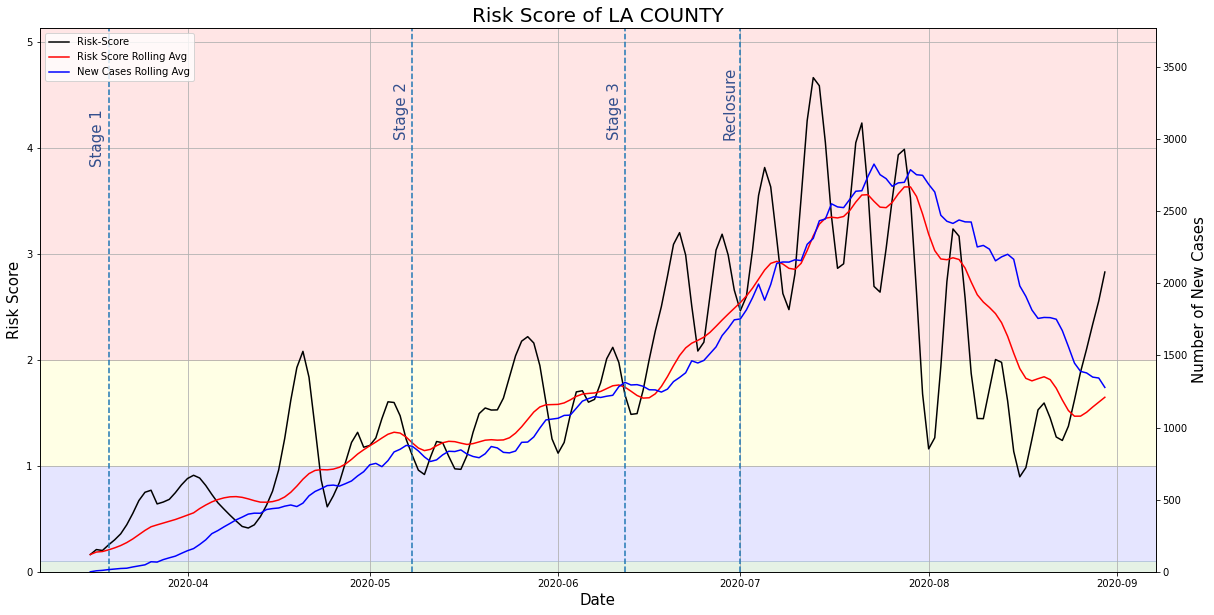

In [25]:
a=plot_rs('LA COUNTY', 18, '')


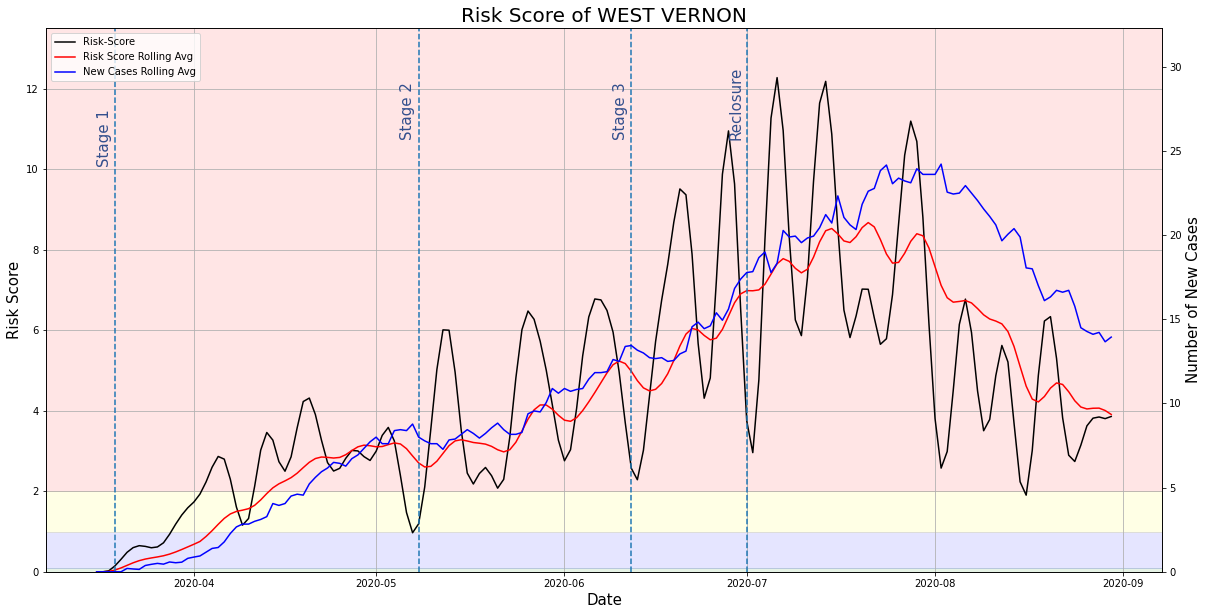

In [26]:
plot_rs('WEST VERNON', 18, '')

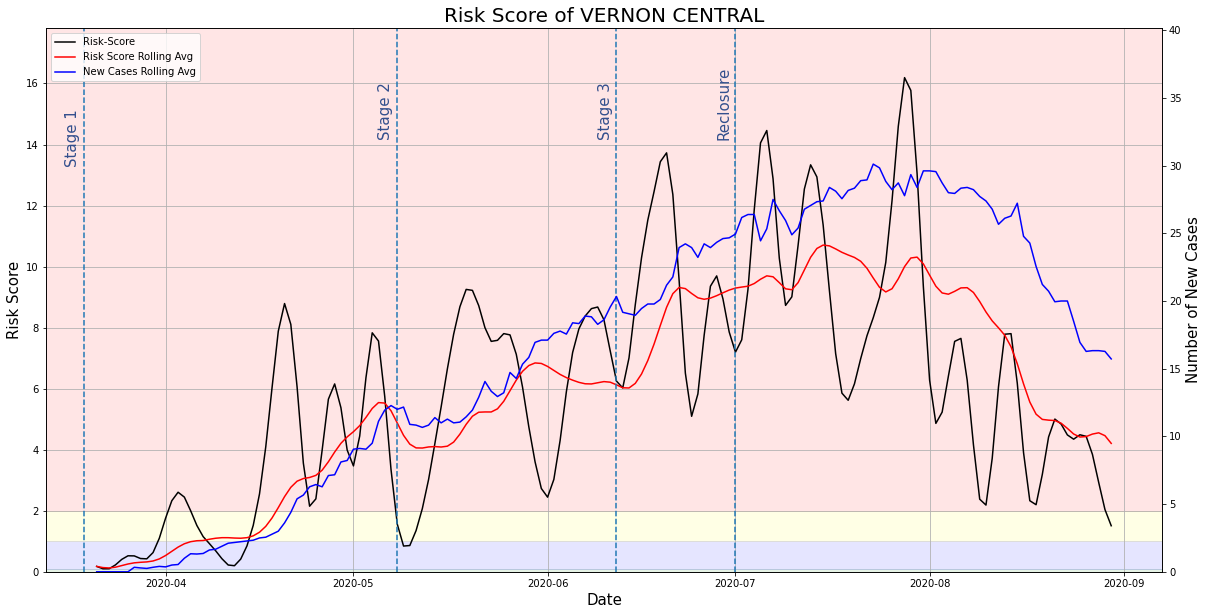

In [27]:
plot_rs('VERNON CENTRAL',18,'')

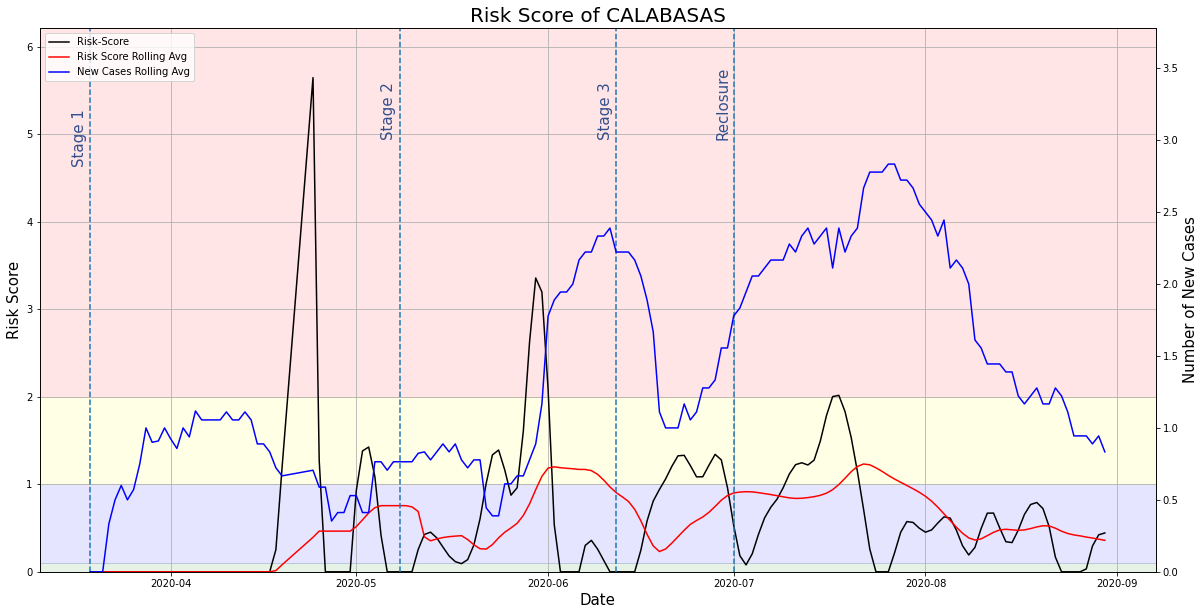

In [33]:
plot_rs('CALABASAS', 18, '')

In [578]:
# This function calculates trend of the Risk-Score at the most current data.
# Input:  length1, length2:    these parameters define the windows Risk Score differences
#         rolling_length:      window of the rolling average calculation
#         rolling_diff_length: window used to calculate the rolling average difference
# Output: recent:             this new dataframe contains list of all regions with calculated Risk Score Trends on the most current data

def rs_trend_summary(length1,length2,rolling_length,rolling_diff_length,rs_or_case):
    
    #intializing variables
    recent = pd.DataFrame()
    df_recent_1= pd.DataFrame()
    df_recent_2= pd.DataFrame()
    recent
    
    df_new=df.copy()
    regions = df_new['Region'].unique()
#     recent['Region']=regions
#     recent['Date']=recent['Region']
    
    
    for region in regions:
        df_region = df_new[df_new['Region']==region].sort_values('Time Stamp')
        
        recent_date = max(df_region['Time Stamp'])
#         recent.loc[recent['Region']=='Alhambra','Date'] = recent_date
        
#         length1_bef = pd.to_datetime(recent_date) - dt.timedelta(days=length1)
#         length2_bef = pd.to_datetime(recent_date) - dt.timedelta(days=length2)

#         df_1_before = df_region[df_region['Time Stamp'] == length1_bef]
#         df_2_before = df_region[df_region['Time Stamp'] == length2_bef]
        df_recent = df_region[df_region['Time Stamp']==recent_date]
        
        
        
        #Rolling Avreage
        if rs_or_case == 'rs':
            rolling_rs = df_region['Risk-Score'].rolling(rolling_length, min_periods=1).mean()

            recent_rolling_rs = rolling_rs.iloc[-1]

            length3 = 0 - rolling_diff_length -1

            past_rolling_rs = rolling_rs.iloc[length3]

            rolling_diff_rs = recent_rolling_rs - past_rolling_rs



            df_recent["Current_Rolling_Average"] = recent_rolling_rs
            df_recent["Past_Rolling_Average"] = past_rolling_rs
            df_recent["Rolling AVG Change"] = rolling_diff_rs
        

            threshhold=1/7

            if rolling_diff_rs > threshhold:
                df_recent['Trend (Abs)'] = 'UP'
            if (rolling_diff_rs < threshhold) & (rolling_diff_rs > -threshhold):
                df_recent['Trend (Abs)'] = '-'
            if rolling_diff_rs < -threshhold:
                df_recent['Trend (Abs)'] = 'DOWN'

            percent_change = (rolling_diff_rs)*100/past_rolling_rs
            percent_threshhold = 5
            df_recent['Percent Change']=round(percent_change)

            if percent_change > percent_threshhold:
                df_recent['Trend (%)'] = 'UP'
            if (percent_change < percent_threshhold) & (percent_change > -percent_threshhold):
                df_recent['Trend (%)'] = '-'
            if percent_change < -percent_threshhold:
                df_recent['Trend (%)'] = 'DOWN'
        
#         if rolling_diff > threshhold:
#             df_recent['Risk_Trend_Abs'] = 'Red'
#         if (rolling_diff < threshhold) & (rolling_diff > -threshhold):
#             df_recent['Risk_Trend_Abs'] = 'Yellow'
#         if rolling_diff < -threshhold:
#             df_recent['Risk_Trend_Abs'] = 'Grenn'




        elif rs_or_case == 'case':
            rolling_case = df_region['New Cases'].rolling(rolling_length, min_periods=1).mean()
            recent_rolling_case = rolling_case.iloc[-1]
            length3 = 0 - rolling_diff_length -1
            past_rolling_case = rolling_case.iloc[length3]
            rolling_diff_case = recent_rolling_case - past_rolling_case

            df_recent["Current_Rolling_Average"] = recent_rolling_case
            df_recent["Past_Rolling_Average"] = past_rolling_case
            df_recent["Rolling AVG Change"] = round(rolling_diff_case,5)
            
            threshhold= 3

            if rolling_diff_case > threshhold:
                df_recent['Trend (Abs)'] = 'UP'
            if (rolling_diff_case < threshhold) & (rolling_diff_case > -threshhold):
                df_recent['Trend (Abs)'] = '-'
            if rolling_diff_case < -threshhold:
                df_recent['Trend (Abs)'] = 'DOWN'

            percent_change = (rolling_diff_case)*100/past_rolling_case
            percent_threshhold = 5
            df_recent['Percent Change']=round(percent_change)

            if percent_change > percent_threshhold:
                df_recent['Trend (%)'] = 'UP'
            if (percent_change < percent_threshhold) & (percent_change > -percent_threshhold):
                df_recent['Trend (%)'] = '-'
            if percent_change < -percent_threshhold:
                df_recent['Trend (%)'] = 'DOWN'
        
            
            
            
        
        recent = recent.append(df_recent).sort_values('Time Stamp')
    recent["Rank"] = recent["Rolling AVG Change"].rank()
    recent["Rank"] = recent["Rank"].astype(int)
    recent = recent.sort_values('Rank')
#         recent= recent.rename(columns={"A": "a", "B": "c"})
#         recent=recent.drop(['index','Time Stamp','Latitude', 'Longitude','RS_change_3_Days','RS_change_14_Days'], axis=1)
    recent = recent[['Time Stamp','Region','Number of cases','Risk-Level','Rank','Rolling AVG Change','Trend (Abs)','Percent Change','Trend (%)']]
    return recent

In [579]:
recent = rs_trend_summary(12,13,18,1,'rs')
recent

C:\Users\kwonk\anaconda3\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kwonk\anaconda3\lib\site-packages\ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kwonk\anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

Time Stamp                    Region  Number of cases  Risk-Level  Rank  \
32844 2020-08-16                   PACOIMA             2799           2     1   
32761 2020-08-16          EAST LOS ANGELES             5379           3     2   
32894 2020-08-16                    SYLMAR             2733           3     3   
32725 2020-08-16             BOYLE HEIGHTS             3750           3     4   
32934 2020-08-16               WILLOWBROOK             1560           2     5   
32794 2020-08-16                 HOLLYWOOD              976           3     6   
32840 2020-08-16           NORTH HOLLYWOOD             2942           3     6   
32885 2020-08-16                SOUTH GATE             3823           3     8   
32849 2020-08-16             PANORAMA CITY             2335           3     9   
32891 2020-08-16                SUN VALLEY             1264           1    10   
32909 2020-08-16                  VAN NUYS             2371           3    11   
32926 2020-08-16               WEST VERNON             1929           3    12   
32737 2020-08-16                   CENTRAL             1825           3    14   
32914 2020-08-16                    VERNON                9           3    14   
32915 2020-08-16            VERNON CENTRAL             2585           3    14   
32796 2020-08-16           HUNTINGTON PARK             2434           3    16   
32756 2020-08-16                    DOWNEY             3445           3    17   
32799 2020-08-16                 INGLEWOOD             2428           3    18   
32710 2020-08-16                    ARLETA             1175           1    19   
32787 2020-08-16              HARVARD PARK             1369           2    20   
32913 2020-08-16             VERMONT VISTA             1648           3    21   
32839 2020-08-16               NORTH HILLS             1492           2    22   
32888 2020-08-16            SOUTH WHITTIER             1513           1    23   
32716 2020-08-16              BALDWIN PARK             2421           3    24   
32854 2020-08-16                PICO-UNION             1578           3    25   
32809 2020-08-16               LAKE BALBOA              812           2    26   
32841 2020-08-16                NORTHRIDGE             1157           0    27   
32720 2020-08-16              BELL GARDENS             1639           3    28   
32929 2020-08-16                  WESTLAKE             2135           3    29   
32792 2020-08-16             HIGHLAND PARK              925           1    30   
32847 2020-08-16                     PALMS              472           1    31   
32739 2020-08-16        CENTURY PALMS/COVE             1302           1    31   
32836 2020-08-16                MONTEBELLO             1901           2    33   
32919 2020-08-16                     WATTS             1604           3    34   
32823 2020-08-16                   LYNWOOD             2765           3    35   
32879 2020-08-16              SHERMAN OAKS              844           2    36   
32886 2020-08-16                SOUTH PARK             1765           2    37   
32732 2020-08-16               CANOGA PARK             1528           1    38   
32936 2020-08-16           WILSHIRE CENTER              959           3    39   
32927 2020-08-16  WEST WHITTIER/LOS NIETOS              824           2    40   
32830 2020-08-16                   MAYWOOD             1196           2    41   
32868 2020-08-16                  ROSEMEAD              698           1    42   
32937 2020-08-16                  WINNETKA             1043           3    43   
32776 2020-08-16                  GLENDALE             2763           3    44   
32850 2020-08-16                 PARAMOUNT             2046           3    45   
32842 2020-08-16                   NORWALK             2791           3    46   
32752 2020-08-16                    CUDAHY              950           3    47   
32935 2020-08-16                WILMINGTON             1447           3    48   
32817 2020-08-16            LITTLE AR

In [537]:
length=min(df['Time Stamp'])-max(df['Time Stamp'])
length/16

Timedelta('-10 days +10:30:00')

In [580]:
aa=calc_risk_trend('HOLLYWOOD',18)

In [581]:
aa

index Time Stamp     Region   Latitude   Longitude  Risk-Score  \
45        45 2020-03-17  HOLLYWOOD  34.098003 -118.329523    0.563459   
86        87 2020-03-18  HOLLYWOOD  34.098003 -118.329523    0.654257   
139      141 2020-03-19  HOLLYWOOD  34.098003 -118.329523    0.760144   
210      214 2020-03-20  HOLLYWOOD  34.098003 -118.329523    0.901890   
291      297 2020-03-21  HOLLYWOOD  34.098003 -118.329523    1.052752   
386      395 2020-03-22  HOLLYWOOD  34.098003 -118.329523    1.216572   
488      500 2020-03-23  HOLLYWOOD  34.098003 -118.329523    1.436596   
601      616 2020-03-24  HOLLYWOOD  34.098003 -118.329523    1.724620   
725      743 2020-03-25  HOLLYWOOD  34.098003 -118.329523    2.118225   
856      877 2020-03-26  HOLLYWOOD  34.098003 -118.329523    2.437818   
1031    1054 2020-03-27  HOLLYWOOD  34.098003 -118.329523    2.560923   
1261    1286 2020-03-28  HOLLYWOOD  34.098003 -118.329523    2.526166   
1499    1526 2020-03-29  HOLLYWOOD  34.098003 -118.329523    2.577344   
1737    1766 2020-03-30  HOLLYWOOD  34.098003 -118.329523    3.154261   
1975    2006 2020-03-31  HOLLYWOOD  34.098003 -118.329523    4.216906   
2213    2246 2020-04-01  HOLLYWOOD  34.098003 -118.329523    5.367223   
4831    4886 2020-04-02  HOLLYWOOD  34.098003 -118.329523    5.833220   
7359    7436 2020-04-03  HOLLYWOOD  34.098003 -118.329523    5.069014   
7830    7911 2020-04-04  HOLLYWOOD  34.098003 -118.329523    3.360500   
8068    8151 2020-04-05  HOLLYWOOD  34.098003 -118.329523    1.351573   
8306    8391 2020-04-06  HOLLYWOOD  34.098003 -118.329523    0.000000   
8544    8631 2020-04-07  HOLLYWOOD  34.098003 -118.329523    0.000000   
8782    8871 2020-04-08  HOLLYWOOD  34.098003 -118.329523    0.000000   
9020    9111 2020-04-09  HOLLYWOOD  34.098003 -118.329523    0.643902   
2451    2486 2020-04-10  HOLLYWOOD  34.098003 -118.329523    1.517802   
2689    2726 2020-04-11  HOLLYWOOD  34.098003 -118.329523    2.351777   
2927    2966 2020-04-12  HOLLYWOOD  34.098003 -118.329523    2.925840   
3165    3206 2020-04-13  HOLLYWOOD  34.098003 -118.329523    3.084547   
3403    3446 2020-04-14  HOLLYWOOD  34.098003 -118.329523    2.918127   
3641    3686 2020-04-15  HOLLYWOOD  34.098003 -118.329523    2.824579   
3879    3926 2020-04-16  HOLLYWOOD  34.098003 -118.329523    3.349282   
4117    4166 2020-04-17  HOLLYWOOD  34.098003 -118.329523    4.831602   
4355    4406 2020-04-18  HOLLYWOOD  34.098003 -118.329523    6.917741   
4593    4646 2020-04-19  HOLLYWOOD  34.098003 -118.329523    8.892544   
5058    5115 2020-04-20  HOLLYWOOD  34.098003 -118.329523    9.858541   
5285    5344 2020-04-21  HOLLYWOOD  34.098003 -118.329523    9.450337   
5512    5573 2020-04-22  HOLLYWOOD  34.098003 -118.329523    8.111388   
5739    5802 2020-04-23  HOLLYWOOD  34.098003 -118.329523    6.591015   
5967    6032 2020-04-24  HOLLYWOOD  34.098003 -118.329523    5.851180   
6196    6263 2020-04-25  HOLLYWOOD  34.098003 -118.329523    5.982002   
6427    6496 2020-04-26  HOLLYWOOD  34.098003 -118.329523    6.675559   
6658    6729 2020-04-27  HOLLYWOOD  34.098003 -118.329523    7.301809   
6889    6962 2020-04-28  HOLLYWOOD  34.098003 -118.329523    7.384938   
7121    7196 2020-04-29  HOLLYWOOD  34.098003 -118.329523    6.970655   
7592    7671 2020-04-30  HOLLYWOOD  34.098003 -118.329523    6.237632   
9254    9347 2020-05-01  HOLLYWOOD  34.098003 -118.329523    5.753083   
11868  11983 2020-05-02  HOLLYWOOD  34.098003 -118.329523    5.777352   
14482  14619 2020-05-03  HOLLYWOOD  34.098003 -118.329523    6.118130   
15193  15336 2020-05-04  HOLLYWOOD  34.098003 -118.329523    6.085261   
15429  15574 2020-05-05  HOLLYWOOD  34.098003 -118.329523    5.059683   
15666  15813 2020-05-06  HOLLYWOOD  34.098003 -118.329523    3.099029   
15904  16053 2020-05-07  HOLLYWOOD  34.098003 -118.329523    1.094786   
16142  16293 2020-05-08  HOLLYWOOD  34.098003 -118.329523    0.029933   
16380  16533 2020-05-09  HOLLYWOOD  34.098003 -118.329523    0.34

In [584]:
10.042708-10.905523

-0.8628150000000012

In [585]:
aaa=calc_risk_trend('NORTH HOLLYWOOD',18)

In [587]:
aaa

index Time Stamp           Region   Latitude   Longitude  Risk-Score  \
54        54 2020-03-17  NORTH HOLLYWOOD  34.172904 -118.374037    0.563459   
95        96 2020-03-18  NORTH HOLLYWOOD  34.172904 -118.374037    0.654257   
150      152 2020-03-19  NORTH HOLLYWOOD  34.172904 -118.374037    0.760144   
225      229 2020-03-20  NORTH HOLLYWOOD  34.172904 -118.374037    0.901890   
309      315 2020-03-21  NORTH HOLLYWOOD  34.172904 -118.374037    1.052752   
404      413 2020-03-22  NORTH HOLLYWOOD  34.172904 -118.374037    1.216572   
508      520 2020-03-23  NORTH HOLLYWOOD  34.172904 -118.374037    1.436596   
622      637 2020-03-24  NORTH HOLLYWOOD  34.172904 -118.374037    1.724620   
744      762 2020-03-25  NORTH HOLLYWOOD  34.172904 -118.374037    2.118225   
883      904 2020-03-26  NORTH HOLLYWOOD  34.172904 -118.374037    2.437818   
1074    1097 2020-03-27  NORTH HOLLYWOOD  34.172904 -118.374037    2.560923   
1307    1332 2020-03-28  NORTH HOLLYWOOD  34.172904 -118.374037    2.526166   
1545    1572 2020-03-29  NORTH HOLLYWOOD  34.172904 -118.374037    2.577344   
1783    1812 2020-03-30  NORTH HOLLYWOOD  34.172904 -118.374037    3.154261   
2021    2052 2020-03-31  NORTH HOLLYWOOD  34.172904 -118.374037    4.216906   
2259    2292 2020-04-01  NORTH HOLLYWOOD  34.172904 -118.374037    5.367223   
4877    4932 2020-04-02  NORTH HOLLYWOOD  34.172904 -118.374037    5.833220   
7405    7482 2020-04-03  NORTH HOLLYWOOD  34.172904 -118.374037    5.069014   
7876    7957 2020-04-04  NORTH HOLLYWOOD  34.172904 -118.374037    3.360500   
8114    8197 2020-04-05  NORTH HOLLYWOOD  34.172904 -118.374037    1.351573   
8352    8437 2020-04-06  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
8590    8677 2020-04-07  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
8828    8917 2020-04-08  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
9066    9157 2020-04-09  NORTH HOLLYWOOD  34.172904 -118.374037    0.643902   
2497    2532 2020-04-10  NORTH HOLLYWOOD  34.172904 -118.374037    1.517802   
2735    2772 2020-04-11  NORTH HOLLYWOOD  34.172904 -118.374037    2.351777   
2973    3012 2020-04-12  NORTH HOLLYWOOD  34.172904 -118.374037    2.925840   
3211    3252 2020-04-13  NORTH HOLLYWOOD  34.172904 -118.374037    3.084547   
3449    3492 2020-04-14  NORTH HOLLYWOOD  34.172904 -118.374037    2.918127   
3687    3732 2020-04-15  NORTH HOLLYWOOD  34.172904 -118.374037    2.824579   
3925    3972 2020-04-16  NORTH HOLLYWOOD  34.172904 -118.374037    3.349282   
4163    4212 2020-04-17  NORTH HOLLYWOOD  34.172904 -118.374037    4.831602   
4401    4452 2020-04-18  NORTH HOLLYWOOD  34.172904 -118.374037    6.917741   
4639    4692 2020-04-19  NORTH HOLLYWOOD  34.172904 -118.374037    8.892544   
5104    5161 2020-04-20  NORTH HOLLYWOOD  34.172904 -118.374037    9.858541   
5331    5390 2020-04-21  NORTH HOLLYWOOD  34.172904 -118.374037    9.450337   
5558    5619 2020-04-22  NORTH HOLLYWOOD  34.172904 -118.374037    8.111388   
5785    5848 2020-04-23  NORTH HOLLYWOOD  34.172904 -118.374037    6.591015   
6013    6078 2020-04-24  NORTH HOLLYWOOD  34.172904 -118.374037    5.851180   
6242    6309 2020-04-25  NORTH HOLLYWOOD  34.172904 -118.374037    5.982002   
6473    6542 2020-04-26  NORTH HOLLYWOOD  34.172904 -118.374037    6.675559   
6704    6775 2020-04-27  NORTH HOLLYWOOD  34.172904 -118.374037    7.301809   
6935    7008 2020-04-28  NORTH HOLLYWOOD  34.172904 -118.374037    7.384938   
7167    7242 2020-04-29  NORTH HOLLYWOOD  34.172904 -118.374037    6.970655   
7638    7717 2020-04-30  NORTH HOLLYWOOD  34.172904 -118.374037    6.237632   
9300    9393 2020-05-01  NORTH HOLLYWOOD  34.172904 -118.374037    5.753083   
11914  12029 2020-05-02  NORTH HOLLYWOOD  34.172904 -118.374037    5.777352   
14528  14665 2020-05-03  NORTH HOLLYWOOD  34.172904 -118.374037    6.118130   
15239  15382 2020-05-04  NORTH HOLLYWOOD  34.172904 -118.374037    6.085261   
15475  15620 2020-05-05  NORTH HOLLYWOOD  34.172904 -118.

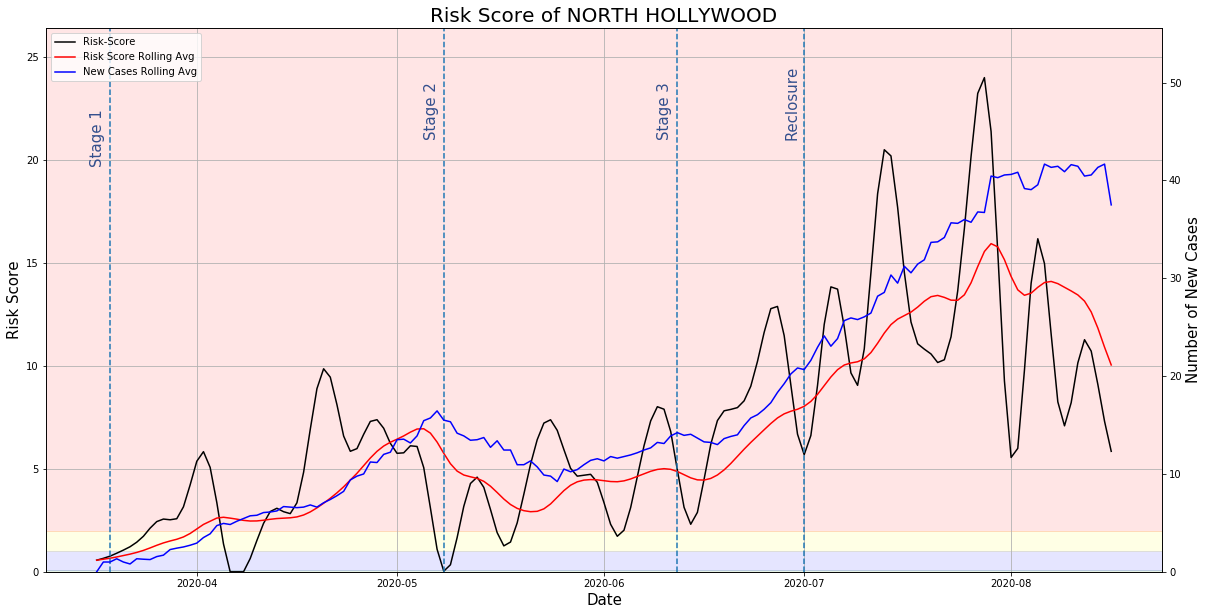

In [597]:
plot_rs('NORTH HOLLYWOOD',18,'')

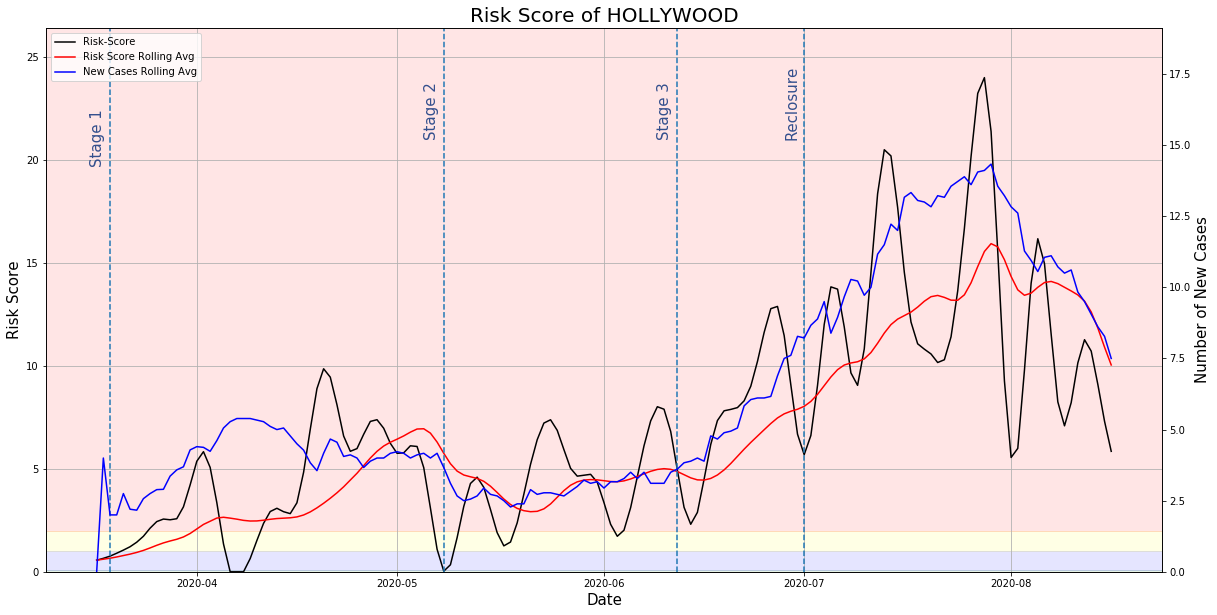

In [596]:
plot_rs('HOLLYWOOD',18,'')

In [591]:
df[df['Region']=='HOLLYWOOD']

index Time Stamp     Region   Latitude   Longitude  Risk-Score  \
45        45 2020-03-17  HOLLYWOOD  34.098003 -118.329523    0.563459   
86        87 2020-03-18  HOLLYWOOD  34.098003 -118.329523    0.654257   
139      141 2020-03-19  HOLLYWOOD  34.098003 -118.329523    0.760144   
210      214 2020-03-20  HOLLYWOOD  34.098003 -118.329523    0.901890   
291      297 2020-03-21  HOLLYWOOD  34.098003 -118.329523    1.052752   
386      395 2020-03-22  HOLLYWOOD  34.098003 -118.329523    1.216572   
488      500 2020-03-23  HOLLYWOOD  34.098003 -118.329523    1.436596   
601      616 2020-03-24  HOLLYWOOD  34.098003 -118.329523    1.724620   
725      743 2020-03-25  HOLLYWOOD  34.098003 -118.329523    2.118225   
856      877 2020-03-26  HOLLYWOOD  34.098003 -118.329523    2.437818   
1031    1054 2020-03-27  HOLLYWOOD  34.098003 -118.329523    2.560923   
1261    1286 2020-03-28  HOLLYWOOD  34.098003 -118.329523    2.526166   
1499    1526 2020-03-29  HOLLYWOOD  34.098003 -118.329523    2.577344   
1737    1766 2020-03-30  HOLLYWOOD  34.098003 -118.329523    3.154261   
1975    2006 2020-03-31  HOLLYWOOD  34.098003 -118.329523    4.216906   
2213    2246 2020-04-01  HOLLYWOOD  34.098003 -118.329523    5.367223   
2451    2486 2020-04-10  HOLLYWOOD  34.098003 -118.329523    1.517802   
2689    2726 2020-04-11  HOLLYWOOD  34.098003 -118.329523    2.351777   
2927    2966 2020-04-12  HOLLYWOOD  34.098003 -118.329523    2.925840   
3165    3206 2020-04-13  HOLLYWOOD  34.098003 -118.329523    3.084547   
3403    3446 2020-04-14  HOLLYWOOD  34.098003 -118.329523    2.918127   
3641    3686 2020-04-15  HOLLYWOOD  34.098003 -118.329523    2.824579   
3879    3926 2020-04-16  HOLLYWOOD  34.098003 -118.329523    3.349282   
4117    4166 2020-04-17  HOLLYWOOD  34.098003 -118.329523    4.831602   
4355    4406 2020-04-18  HOLLYWOOD  34.098003 -118.329523    6.917741   
4593    4646 2020-04-19  HOLLYWOOD  34.098003 -118.329523    8.892544   
4831    4886 2020-04-02  HOLLYWOOD  34.098003 -118.329523    5.833220   
5058    5115 2020-04-20  HOLLYWOOD  34.098003 -118.329523    9.858541   
5285    5344 2020-04-21  HOLLYWOOD  34.098003 -118.329523    9.450337   
5512    5573 2020-04-22  HOLLYWOOD  34.098003 -118.329523    8.111388   
5739    5802 2020-04-23  HOLLYWOOD  34.098003 -118.329523    6.591015   
5967    6032 2020-04-24  HOLLYWOOD  34.098003 -118.329523    5.851180   
6196    6263 2020-04-25  HOLLYWOOD  34.098003 -118.329523    5.982002   
6427    6496 2020-04-26  HOLLYWOOD  34.098003 -118.329523    6.675559   
6658    6729 2020-04-27  HOLLYWOOD  34.098003 -118.329523    7.301809   
6889    6962 2020-04-28  HOLLYWOOD  34.098003 -118.329523    7.384938   
7121    7196 2020-04-29  HOLLYWOOD  34.098003 -118.329523    6.970655   
7359    7436 2020-04-03  HOLLYWOOD  34.098003 -118.329523    5.069014   
7592    7671 2020-04-30  HOLLYWOOD  34.098003 -118.329523    6.237632   
7830    7911 2020-04-04  HOLLYWOOD  34.098003 -118.329523    3.360500   
8068    8151 2020-04-05  HOLLYWOOD  34.098003 -118.329523    1.351573   
8306    8391 2020-04-06  HOLLYWOOD  34.098003 -118.329523    0.000000   
8544    8631 2020-04-07  HOLLYWOOD  34.098003 -118.329523    0.000000   
8782    8871 2020-04-08  HOLLYWOOD  34.098003 -118.329523    0.000000   
9020    9111 2020-04-09  HOLLYWOOD  34.098003 -118.329523    0.643902   
9254    9347 2020-05-01  HOLLYWOOD  34.098003 -118.329523    5.753083   
9492    9587 2020-05-10  HOLLYWOOD  34.098003 -118.329523    1.656855   
9730    9827 2020-05-11  HOLLYWOOD  34.098003 -118.329523    3.176900   
9968   10067 2020-05-12  HOLLYWOOD  34.098003 -118.329523    4.288585   
10206  10307 2020-05-13  HOLLYWOOD  34.098003 -118.329523    4.596020   
10444  10547 2020-05-14  HOLLYWOOD  34.098003 -118.329523    4.099312   
10682  10787 2020-05-15  HOLLYWOOD  34.098003 -118.329523    3.025407   
10920  11027 2020-05-16  HOLLYWOOD  34.098003 -118.329523    1.902498   
11158  11267 2020-05-17  HOLLYWOOD  34.098003 -118.329523    1.25

In [593]:
df[df['Region']=='NORTH HOLLYWOOD']

index Time Stamp           Region   Latitude   Longitude  Risk-Score  \
54        54 2020-03-17  NORTH HOLLYWOOD  34.172904 -118.374037    0.563459   
95        96 2020-03-18  NORTH HOLLYWOOD  34.172904 -118.374037    0.654257   
150      152 2020-03-19  NORTH HOLLYWOOD  34.172904 -118.374037    0.760144   
225      229 2020-03-20  NORTH HOLLYWOOD  34.172904 -118.374037    0.901890   
309      315 2020-03-21  NORTH HOLLYWOOD  34.172904 -118.374037    1.052752   
404      413 2020-03-22  NORTH HOLLYWOOD  34.172904 -118.374037    1.216572   
508      520 2020-03-23  NORTH HOLLYWOOD  34.172904 -118.374037    1.436596   
622      637 2020-03-24  NORTH HOLLYWOOD  34.172904 -118.374037    1.724620   
744      762 2020-03-25  NORTH HOLLYWOOD  34.172904 -118.374037    2.118225   
883      904 2020-03-26  NORTH HOLLYWOOD  34.172904 -118.374037    2.437818   
1074    1097 2020-03-27  NORTH HOLLYWOOD  34.172904 -118.374037    2.560923   
1307    1332 2020-03-28  NORTH HOLLYWOOD  34.172904 -118.374037    2.526166   
1545    1572 2020-03-29  NORTH HOLLYWOOD  34.172904 -118.374037    2.577344   
1783    1812 2020-03-30  NORTH HOLLYWOOD  34.172904 -118.374037    3.154261   
2021    2052 2020-03-31  NORTH HOLLYWOOD  34.172904 -118.374037    4.216906   
2259    2292 2020-04-01  NORTH HOLLYWOOD  34.172904 -118.374037    5.367223   
2497    2532 2020-04-10  NORTH HOLLYWOOD  34.172904 -118.374037    1.517802   
2735    2772 2020-04-11  NORTH HOLLYWOOD  34.172904 -118.374037    2.351777   
2973    3012 2020-04-12  NORTH HOLLYWOOD  34.172904 -118.374037    2.925840   
3211    3252 2020-04-13  NORTH HOLLYWOOD  34.172904 -118.374037    3.084547   
3449    3492 2020-04-14  NORTH HOLLYWOOD  34.172904 -118.374037    2.918127   
3687    3732 2020-04-15  NORTH HOLLYWOOD  34.172904 -118.374037    2.824579   
3925    3972 2020-04-16  NORTH HOLLYWOOD  34.172904 -118.374037    3.349282   
4163    4212 2020-04-17  NORTH HOLLYWOOD  34.172904 -118.374037    4.831602   
4401    4452 2020-04-18  NORTH HOLLYWOOD  34.172904 -118.374037    6.917741   
4639    4692 2020-04-19  NORTH HOLLYWOOD  34.172904 -118.374037    8.892544   
4877    4932 2020-04-02  NORTH HOLLYWOOD  34.172904 -118.374037    5.833220   
5104    5161 2020-04-20  NORTH HOLLYWOOD  34.172904 -118.374037    9.858541   
5331    5390 2020-04-21  NORTH HOLLYWOOD  34.172904 -118.374037    9.450337   
5558    5619 2020-04-22  NORTH HOLLYWOOD  34.172904 -118.374037    8.111388   
5785    5848 2020-04-23  NORTH HOLLYWOOD  34.172904 -118.374037    6.591015   
6013    6078 2020-04-24  NORTH HOLLYWOOD  34.172904 -118.374037    5.851180   
6242    6309 2020-04-25  NORTH HOLLYWOOD  34.172904 -118.374037    5.982002   
6473    6542 2020-04-26  NORTH HOLLYWOOD  34.172904 -118.374037    6.675559   
6704    6775 2020-04-27  NORTH HOLLYWOOD  34.172904 -118.374037    7.301809   
6935    7008 2020-04-28  NORTH HOLLYWOOD  34.172904 -118.374037    7.384938   
7167    7242 2020-04-29  NORTH HOLLYWOOD  34.172904 -118.374037    6.970655   
7405    7482 2020-04-03  NORTH HOLLYWOOD  34.172904 -118.374037    5.069014   
7638    7717 2020-04-30  NORTH HOLLYWOOD  34.172904 -118.374037    6.237632   
7876    7957 2020-04-04  NORTH HOLLYWOOD  34.172904 -118.374037    3.360500   
8114    8197 2020-04-05  NORTH HOLLYWOOD  34.172904 -118.374037    1.351573   
8352    8437 2020-04-06  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
8590    8677 2020-04-07  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
8828    8917 2020-04-08  NORTH HOLLYWOOD  34.172904 -118.374037    0.000000   
9066    9157 2020-04-09  NORTH HOLLYWOOD  34.172904 -118.374037    0.643902   
9300    9393 2020-05-01  NORTH HOLLYWOOD  34.172904 -118.374037    5.753083   
9538    9633 2020-05-10  NORTH HOLLYWOOD  34.172904 -118.374037    1.656855   
9776    9873 2020-05-11  NORTH HOLLYWOOD  34.172904 -118.374037    3.176900   
10014  10113 2020-05-12  NORTH HOLLYWOOD  34.172904 -118.374037    4.288585   
10252  10353 2020-05-13  NORTH HOLLYWOOD  34.172904 -118.